In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from inspect_util import Chunk

In [2]:
df = pd.read_csv('data/partial_order_result.csv')
print(f'Total number of chunks: {len(df)}')
df.head()

Total number of chunks: 13573


,chunk_id,partial_order,chunk_size,resolution_size
0,776662,True,18,12
1,776782,True,113,101
2,776793,True,6,5
3,776828,True,5,3
4,776863,True,6,5


In [3]:
malformed_chunks = pd.read_csv('data/malformed_chunks.csv')
malformed_chunks = malformed_chunks['chunk_id'].unique()
print(f'Removing {len(malformed_chunks)} malformed chunks')
df = df[~df['chunk_id'].isin(malformed_chunks)]
print(f'Total number of chunks: {len(df)}')

Removing 264 malformed chunks
Total number of chunks: 13309


### In how many chunks the resolution could not be isolated from the context?

In [4]:
imprecise = df[df['partial_order'] == 'manual']
print(f'In {len(imprecise)} ({(len(imprecise)/len(df))*100:.2f}%) of {len(df)} chunks the resolution could not be isolated from the context')
df = df[df['partial_order'] != 'manual']
print(f'Total number of valid chunks: {len(df)}')

In 2583 (19.41%) of 13309 chunks the resolution could not be isolated from the context
Total number of valid chunks: 10726


### What is the percentage of chunks that violates the partial order in the resolution?

In [5]:
violates_partial_order = df[df['partial_order'] == 'False']
does_not_violate = df[df['partial_order'] == 'True']
print(f'{len(violates_partial_order)} ({(len(violates_partial_order)/len(df))*100:.2f}%) of {len(df)} chunks violate the partial order')

142 (1.32%) of 10726 chunks violate the partial order


In [6]:
df[df['chunk_size'] > 1000]['partial_order'].value_counts()

False    9
True     4
Name: partial_order, dtype: int64

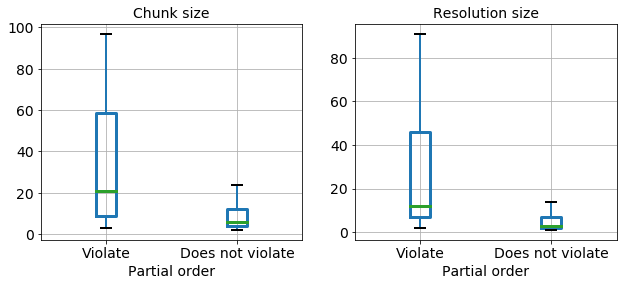

In [7]:
fig, ax = plt.subplots(1, 2, figsize=(10, 4))
boxprops = dict(linestyle='-', linewidth=3)
medianprops = dict(linestyle='-', linewidth=3)
whiskerprops=dict(linestyle='-', linewidth=2)
capprops=dict(linestyle='-', linewidth=2)
df.boxplot(['chunk_size'], 'partial_order', showfliers=False, ax=ax[0], medianprops=medianprops, boxprops=boxprops, whiskerprops=whiskerprops, capprops=capprops)
df.boxplot(['resolution_size'], 'partial_order', showfliers=False, ax=ax[1], medianprops=medianprops, boxprops=boxprops, whiskerprops=whiskerprops, capprops=capprops)
ax[0].set_xticklabels(['Violate', 'Does not violate'], fontsize=14)
ax[1].set_xticklabels(['Violate', 'Does not violate'], fontsize=14)
ax[0].set_xlabel("Partial order", fontsize=14)
ax[1].set_xlabel("Partial order", fontsize=14)
ax[0].set_title("Chunk size", fontsize=14)
ax[1].set_title("Resolution size", fontsize=14)
ax[0].tick_params(axis="x", labelsize=14)
ax[0].tick_params(axis="y", labelsize=14)
ax[1].tick_params(axis="x", labelsize=14)
ax[1].tick_params(axis="y", labelsize=14)
fig.suptitle('')
plt.show()
fig.savefig('figures/rq4_violation_characteristics.png', dpi=300, bbox_inches = "tight")

### Characteristics of chunks where the resolution violates the partial order

In [8]:
violates_partial_order[['chunk_size','resolution_size']].describe().round(2)

,chunk_size,resolution_size
count,142.00,142.00
mean,180.73,104.88
std,449.18,238.30
min,3.00,2.00
25%,9.00,7.00
50%,21.00,12.00
75%,58.50,46.00
max,2922.00,1557.00


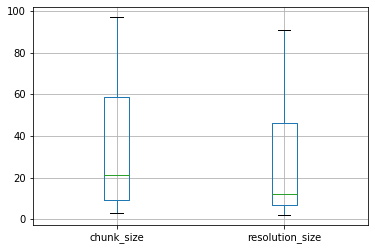

In [9]:
violates_partial_order[['chunk_size', 'resolution_size']].boxplot(showfliers=False)

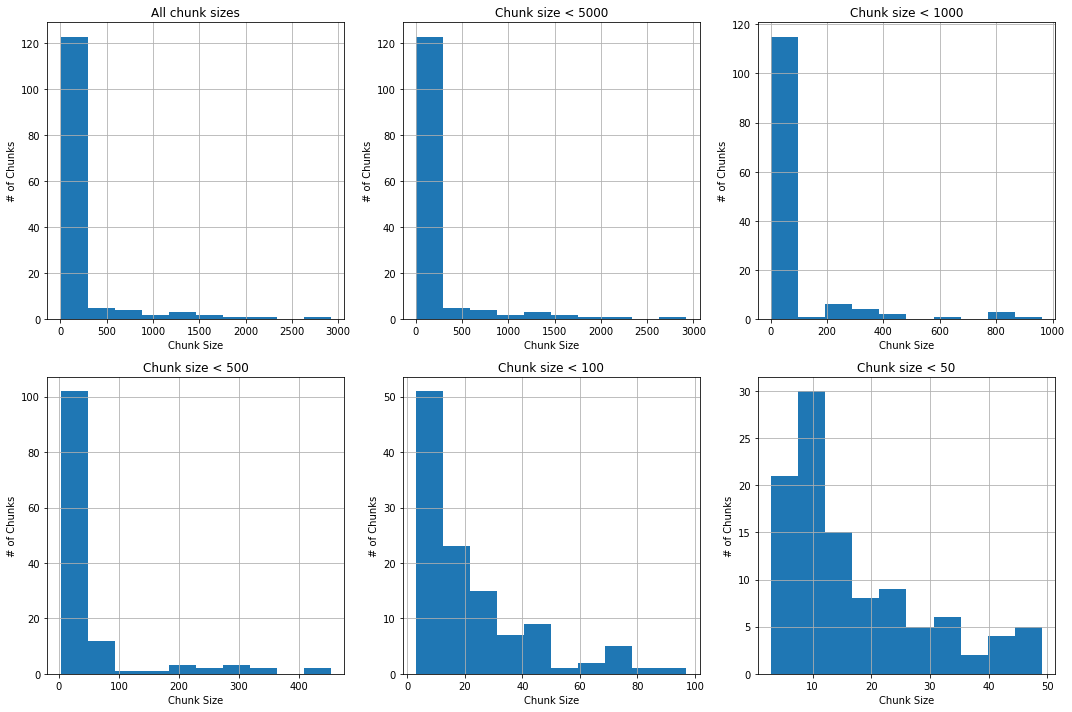

In [10]:
fig, ax = plt.subplots(2, 3, figsize=(15, 10))
violates_partial_order['chunk_size'].hist(bins=10, ax=ax[0][0])
ax[0][0].set_title('All chunk sizes')

violates_partial_order[violates_partial_order['chunk_size'] < 5000]['chunk_size'].hist(bins=10, ax=ax[0][1])
ax[0][1].set_title('Chunk size < 5000')

violates_partial_order[violates_partial_order['chunk_size'] < 1000]['chunk_size'].hist(bins=10, ax=ax[0][2])
ax[0][2].set_title('Chunk size < 1000')

violates_partial_order[violates_partial_order['chunk_size'] < 500]['chunk_size'].hist(bins=10, ax=ax[1][0])
ax[1][0].set_title('Chunk size < 500')

violates_partial_order[violates_partial_order['chunk_size'] < 100]['chunk_size'].hist(bins=10, ax=ax[1][1])
ax[1][1].set_title('Chunk size < 100')

violates_partial_order[violates_partial_order['chunk_size'] < 50]['chunk_size'].hist(bins=10, ax=ax[1][2])
ax[1][2].set_title('Chunk size < 50')
for i in range(2):
    for j in range(3):
        ax[i][j].set_xlabel("Chunk Size")
        ax[i][j].set_ylabel("# of Chunks")
        
fig.tight_layout()

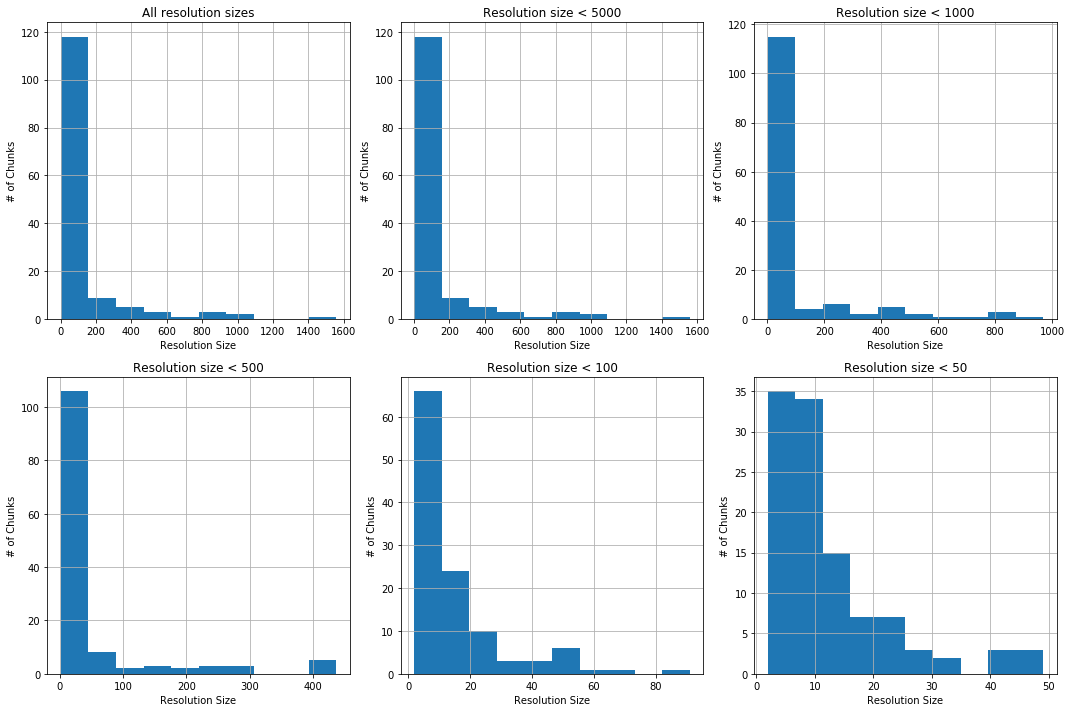

In [11]:
fig, ax = plt.subplots(2, 3, figsize=(15, 10))
violates_partial_order['resolution_size'].hist(bins=10, ax=ax[0][0])
ax[0][0].set_title('All resolution sizes')

violates_partial_order[violates_partial_order['resolution_size'] < 5000]['resolution_size'].hist(bins=10, ax=ax[0][1])
ax[0][1].set_title('Resolution size < 5000')

violates_partial_order[violates_partial_order['resolution_size'] < 1000]['resolution_size'].hist(bins=10, ax=ax[0][2])
ax[0][2].set_title('Resolution size < 1000')

violates_partial_order[violates_partial_order['resolution_size'] < 500]['resolution_size'].hist(bins=10, ax=ax[1][0])
ax[1][0].set_title('Resolution size < 500')

violates_partial_order[violates_partial_order['resolution_size'] < 100]['resolution_size'].hist(bins=10, ax=ax[1][1])
ax[1][1].set_title('Resolution size < 100')

violates_partial_order[violates_partial_order['resolution_size'] < 50]['resolution_size'].hist(bins=10, ax=ax[1][2])
ax[1][2].set_title('Resolution size < 50')

for i in range(2):
    for j in range(3):
        ax[i][j].set_xlabel("Resolution Size")
        ax[i][j].set_ylabel("# of Chunks")
fig.tight_layout()

### Characteristics of chunks where the resolution does not violate the partial order

In [12]:
does_not_violate[['chunk_size','resolution_size']].describe().round(2)

,chunk_size,resolution_size
count,10584.00,10584.00
mean,12.83,7.08
std,38.63,19.85
min,2.00,1.00
25%,4.00,2.00
50%,6.00,3.00
75%,12.00,7.00
max,1851.00,948.00


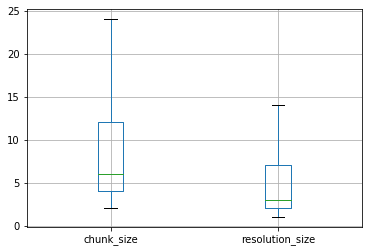

In [13]:
does_not_violate[['chunk_size', 'resolution_size']].boxplot(showfliers=False)

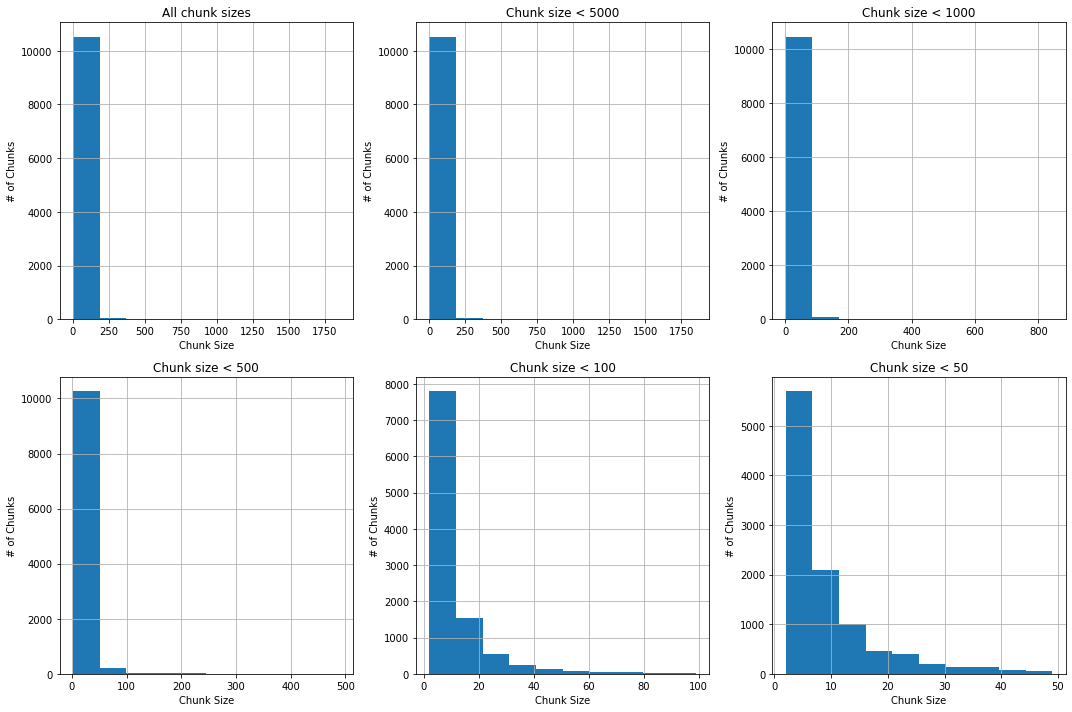

In [14]:
fig, ax = plt.subplots(2, 3, figsize=(15, 10))
does_not_violate['chunk_size'].hist(bins=10, ax=ax[0][0])
ax[0][0].set_title('All chunk sizes')

does_not_violate[does_not_violate['chunk_size'] < 5000]['chunk_size'].hist(bins=10, ax=ax[0][1])
ax[0][1].set_title('Chunk size < 5000')

does_not_violate[does_not_violate['chunk_size'] < 1000]['chunk_size'].hist(bins=10, ax=ax[0][2])
ax[0][2].set_title('Chunk size < 1000')

does_not_violate[does_not_violate['chunk_size'] < 500]['chunk_size'].hist(bins=10, ax=ax[1][0])
ax[1][0].set_title('Chunk size < 500')

does_not_violate[does_not_violate['chunk_size'] < 100]['chunk_size'].hist(bins=10, ax=ax[1][1])
ax[1][1].set_title('Chunk size < 100')

does_not_violate[does_not_violate['chunk_size'] < 50]['chunk_size'].hist(bins=10, ax=ax[1][2])
ax[1][2].set_title('Chunk size < 50')

for i in range(2):
    for j in range(3):
        ax[i][j].set_xlabel("Chunk Size")
        ax[i][j].set_ylabel("# of Chunks")
fig.tight_layout()

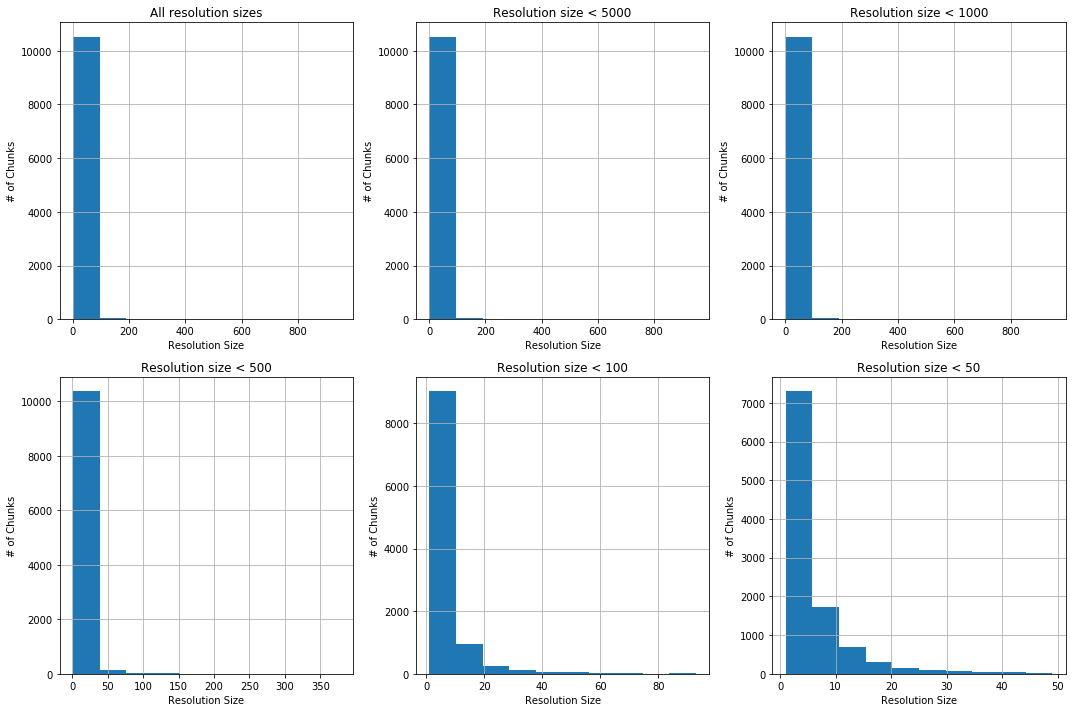

In [15]:
fig, ax = plt.subplots(2, 3, figsize=(15, 10))
does_not_violate['resolution_size'].hist(bins=10, ax=ax[0][0])
ax[0][0].set_title('All resolution sizes')

does_not_violate[does_not_violate['resolution_size'] < 5000]['resolution_size'].hist(bins=10, ax=ax[0][1])
ax[0][1].set_title('Resolution size < 5000')

does_not_violate[does_not_violate['resolution_size'] < 1000]['resolution_size'].hist(bins=10, ax=ax[0][2])
ax[0][2].set_title('Resolution size < 1000')

does_not_violate[does_not_violate['resolution_size'] < 500]['resolution_size'].hist(bins=10, ax=ax[1][0])
ax[1][0].set_title('Resolution size < 500')

does_not_violate[does_not_violate['resolution_size'] < 100]['resolution_size'].hist(bins=10, ax=ax[1][1])
ax[1][1].set_title('Resolution size < 100')

does_not_violate[does_not_violate['resolution_size'] < 50]['resolution_size'].hist(bins=10, ax=ax[1][2])
ax[1][2].set_title('Resolution size < 50')

for i in range(2):
    for j in range(3):
        ax[i][j].set_xlabel("Resolution Size")
        ax[i][j].set_ylabel("# of Chunks")
fig.tight_layout()

### Random sample of small chunks that violate the partial order

In [16]:
sample = violates_partial_order[violates_partial_order['chunk_size'] <= 15].sample(10, random_state = 42)
sample.head()

,chunk_id,partial_order,chunk_size,resolution_size
9563,1201894,False,13,8
11357,1387384,False,9,7
27,777310,False,8,6
11963,1411872,False,9,4
553,791115,False,9,7


#### Chunk 1

In [17]:
chunk1 = Chunk(int(sample.iloc[0]['chunk_id']))

##### Conflicting chunk text

In [18]:
print(chunk1.get_conflict_text())


package org.nuxeo.webengine.sites;

<<<<<<<
import static org.nuxeo.webengine.utils.SiteUtilsConstants.ALL_WEBPAGES;
import static org.nuxeo.webengine.utils.SiteUtilsConstants.CONTEXTUAL_LINKS;
import static org.nuxeo.webengine.utils.SiteUtilsConstants.DESCRIPTION;
import static org.nuxeo.webengine.utils.SiteUtilsConstants.LAST_PUBLISHED_PAGES;
import static org.nuxeo.webengine.utils.SiteUtilsConstants.NAME;
import static org.nuxeo.webengine.utils.SiteUtilsConstants.RESULTS;
import static org.nuxeo.webengine.utils.SiteUtilsConstants.WELCOME_TEXT;
import static org.nuxeo.webengine.utils.SiteUtilsConstants.PAGE_TITLE;
import static org.nuxeo.webengine.utils.SiteUtilsConstants.CONTEXTUAL_LINKS;
import static org.nuxeo.webengine.utils.SiteUtilsConstants.LAST_PUBLISHED_PAGES;
import static org.nuxeo.webengine.utils.SiteUtilsConstants.SITE_DESCRIPTION;
import static org.nuxeo.webengine.utils.SiteUtilsConstants.SITE_NAME;
import static org.nuxeo.webengine.utils.SiteUtilsConstants.WELCOME_TEX

##### Resolution

In [19]:
print(chunk1.resolution)


package org.nuxeo.webengine.sites;

import static org.nuxeo.webengine.utils.SiteUtilsConstants.ALL_WEBPAGES;
import static org.nuxeo.webengine.utils.SiteUtilsConstants.CONTEXTUAL_LINKS;
import static org.nuxeo.webengine.utils.SiteUtilsConstants.DESCRIPTION;
import static org.nuxeo.webengine.utils.SiteUtilsConstants.LAST_PUBLISHED_PAGES;
import static org.nuxeo.webengine.utils.SiteUtilsConstants.NAME;
import static org.nuxeo.webengine.utils.SiteUtilsConstants.PAGE_TITLE;
import static org.nuxeo.webengine.utils.SiteUtilsConstants.RESULTS;
import static org.nuxeo.webengine.utils.SiteUtilsConstants.WELCOME_TEXT;

import java.util.ArrayList;
import java.util.HashMap;



Order of the imports was changed

#### Chunk 2

In [20]:
chunk2 = Chunk(sample.iloc[1]['chunk_id'])

##### Conflicting chunk text

In [21]:
print(chunk2.get_conflict_text())

    }

    @Override
<<<<<<<
    public String getParameter(String parameterName) {
        return httpServletRequest.getParameter(parameterName);
    }

    @Override
    public Enumeration<String> getParameterNames() {
        return httpServletRequest.getParameterNames();
    public String getMethod() {
        return httpServletRequest.getMethod();
>>>>>>>
    }

    @Override




##### Resolution

In [22]:
print(chunk2.resolution)

    }

    @Override
    public String getMethod() {
        return httpServletRequest.getMethod();
    }

    @Override
    public String getParameter(String parameterName) {
        return httpServletRequest.getParameter(parameterName);
    }

    @Override



The order of the closing brackets has changed.

##### Chunk 3

In [23]:
chunk3 = Chunk(sample.iloc[2]['chunk_id'])

##### Conflicting chunk text

In [24]:
print(chunk3.get_conflict_text())

		ServiceModeller modeller = getServiceModeller();
		if (modeller == null)
			return;
<<<<<<<
		ParsedServiceElements elements = manager.getServiceElements(directory);
		if (computeServiceRequirements)
			computeOsgiServiceRequirements(elements.getReferences());
		if (computeServiceCapabilities)
			computeOsgiServiceCapabilities(elements.getServices());
        ServiceModeller.ServiceModel model = modeller.computeRequirementsAndCapabilities(this, directory);
        capabilities.addAll(model.getServiceCapabilities());
        requirements.addAll(model.getServiceRequirements());
>>>>>>>
	}
	
	private void computeRequirementsOtherThanService() {




##### Resolution

In [25]:
print(chunk3.resolution)

		ServiceModeller modeller = getServiceModeller();
		if (modeller == null)
			return;

		ServiceModeller.ServiceModel model = modeller.computeRequirementsAndCapabilities(this, directory);
		if (computeServiceCapabilities)
			capabilities.addAll(model.getServiceCapabilities());
		if (computeServiceRequirements)
			requirements.addAll(model.getServiceRequirements());
	}
	
	private void computeRequirementsOtherThanService() {



The order of the method calls from v1 has changed

##### Chunk 4

In [26]:
chunk4 = Chunk(sample.iloc[3]['chunk_id'])

##### Conflicting chunk text

In [27]:
print(chunk4.get_conflict_text())

import lcm.lcm.LCMDataInputStream;
import lcm.lcm.LCMSubscriber;

<<<<<<<
import abolt.lcmtypes.*;
import april.vis.*;
import april.vis.*;

import abolt.bolt.*;
import abolt.classify.ColorFeatureExtractor;
import abolt.lcmtypes.*;
import abolt.objects.*;
import abolt.util.*;
>>>>>>>

public class KinectCamera implements IBoltCamera, LCMSubscriber {
    final static int K_WIDTH = kinect_status_t.WIDTH;




##### Resolution

In [28]:
print(chunk4.resolution)

import lcm.lcm.LCMDataInputStream;
import lcm.lcm.LCMSubscriber;

import abolt.lcmtypes.*;
import april.vis.*;
import abolt.util.*;
import abolt.classify.ColorFeatureExtractor;

public class KinectCamera implements IBoltCamera, LCMSubscriber {
    final static int K_WIDTH = kinect_status_t.WIDTH;



Order of the imports was changed in the resolution

##### Chunk 5

In [29]:
chunk5 = Chunk(sample.iloc[4]['chunk_id'])

##### Conflicting chunk text

In [30]:
print(chunk5.get_conflict_text())

<<<<<<<
        init(classes);

    @SuppressWarnings("serial")
    public SendEventPage(List<Class<? extends Event>> classes) {
    }

    private void init(List<? extends Class<?>> classes) {
        Form<?> form = new Form<Object>("form");
        Form<Object> form = new Form<Object>("form");
>>>>>>>
        add(form);
        ChoiceRenderer<Class<?>> choiceRenderer = new ChoiceRenderer<Class<?>>("canonicalName", "simpleName");
        dropDownChoice = new DropDownChoice<Class<?>>("dropdown", classes, choiceRenderer);




##### Resolution

In [31]:
print(chunk5.resolution)


    @SuppressWarnings("serial")
    public SendEventPage(List<Class<? extends Event>> classes) {
        init(classes);
    }

    private void init(List<? extends Class<?>> classes) {
        Form<Object> form = new Form<Object>("form");
        add(form);
        ChoiceRenderer<Class<?>> choiceRenderer = new ChoiceRenderer<Class<?>>("canonicalName", "simpleName");
        dropDownChoice = new DropDownChoice<Class<?>>("dropdown", classes, choiceRenderer);



The order of a method call (init(classes)) has changed in the resolution

# Characteristics of the chunks where the resolution could not be isolated from the context

In [32]:
imprecise[['chunk_size','resolution_size']].describe().round(2)

,chunk_size,resolution_size
count,2583.00,2583.00
mean,291.33,154.02
std,1145.90,572.47
min,1.00,7.00
25%,10.00,10.00
50%,26.00,19.00
75%,115.50,72.00
max,27109.00,13037.00


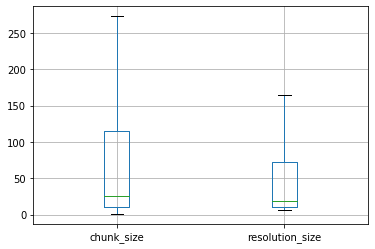

In [33]:
imprecise[['chunk_size', 'resolution_size']].boxplot(showfliers=False)

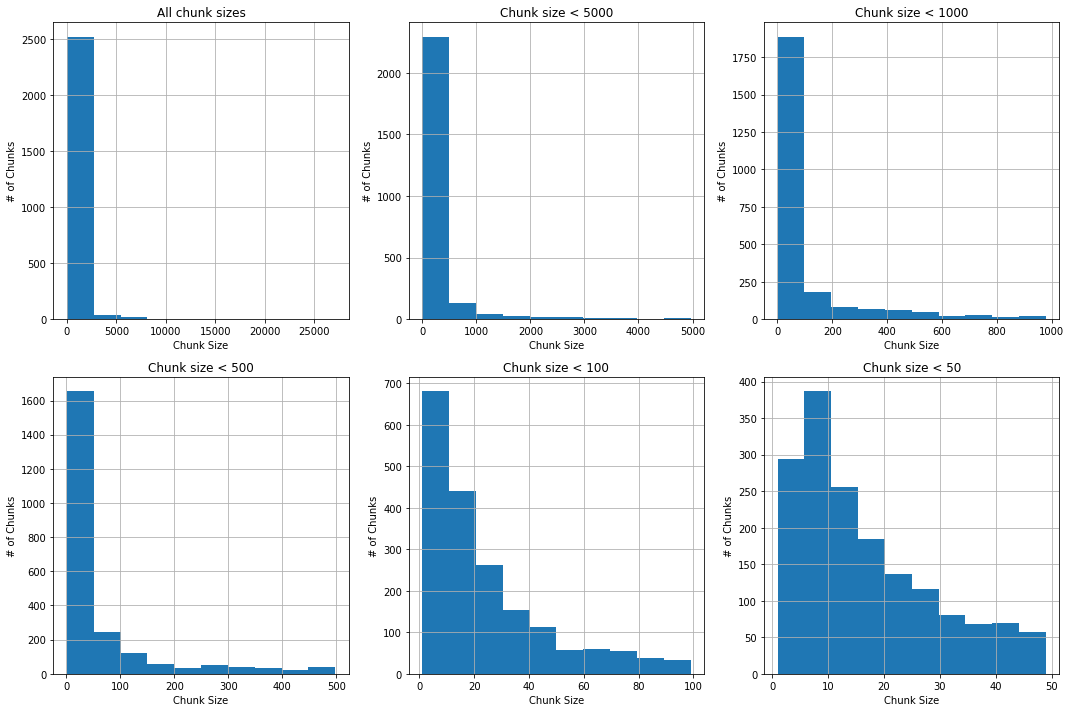

In [34]:
fig, ax = plt.subplots(2, 3, figsize=(15, 10))
imprecise['chunk_size'].hist(bins=10, ax=ax[0][0])
ax[0][0].set_title('All chunk sizes')

imprecise[imprecise['chunk_size'] < 5000]['chunk_size'].hist(bins=10, ax=ax[0][1])
ax[0][1].set_title('Chunk size < 5000')

imprecise[imprecise['chunk_size'] < 1000]['chunk_size'].hist(bins=10, ax=ax[0][2])
ax[0][2].set_title('Chunk size < 1000')

imprecise[imprecise['chunk_size'] < 500]['chunk_size'].hist(bins=10, ax=ax[1][0])
ax[1][0].set_title('Chunk size < 500')

imprecise[imprecise['chunk_size'] < 100]['chunk_size'].hist(bins=10, ax=ax[1][1])
ax[1][1].set_title('Chunk size < 100')

imprecise[imprecise['chunk_size'] < 50]['chunk_size'].hist(bins=10, ax=ax[1][2])
ax[1][2].set_title('Chunk size < 50')
for i in range(2):
    for j in range(3):
        ax[i][j].set_xlabel("Chunk Size")
        ax[i][j].set_ylabel("# of Chunks")
        
fig.tight_layout()

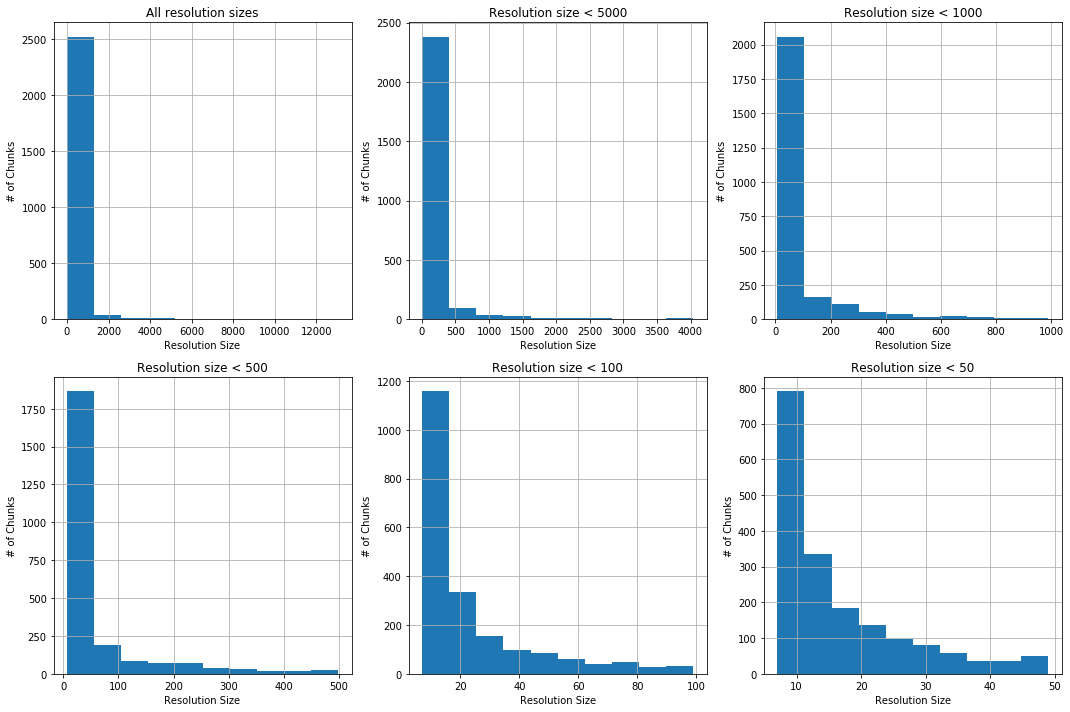

In [35]:
fig, ax = plt.subplots(2, 3, figsize=(15, 10))
imprecise['resolution_size'].hist(bins=10, ax=ax[0][0])
ax[0][0].set_title('All resolution sizes')

imprecise[imprecise['resolution_size'] < 5000]['resolution_size'].hist(bins=10, ax=ax[0][1])
ax[0][1].set_title('Resolution size < 5000')

imprecise[imprecise['resolution_size'] < 1000]['resolution_size'].hist(bins=10, ax=ax[0][2])
ax[0][2].set_title('Resolution size < 1000')

imprecise[imprecise['resolution_size'] < 500]['resolution_size'].hist(bins=10, ax=ax[1][0])
ax[1][0].set_title('Resolution size < 500')

imprecise[imprecise['resolution_size'] < 100]['resolution_size'].hist(bins=10, ax=ax[1][1])
ax[1][1].set_title('Resolution size < 100')

imprecise[imprecise['resolution_size'] < 50]['resolution_size'].hist(bins=10, ax=ax[1][2])
ax[1][2].set_title('Resolution size < 50')

for i in range(2):
    for j in range(3):
        ax[i][j].set_xlabel("Resolution Size")
        ax[i][j].set_ylabel("# of Chunks")
fig.tight_layout()

## Relationship between partial order violation and chunk size

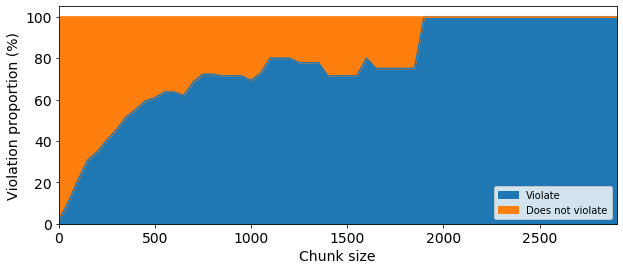

In [45]:
max_chunk_size = max(violates_partial_order['chunk_size'].max(), does_not_violate['chunk_size'].max())
plot_data = []
fig, ax = plt.subplots(1, 1, figsize=(10, 4))

for i in range(0, max_chunk_size, 50):
    violate_count = int(len(violates_partial_order[violates_partial_order['chunk_size'] > i]))
    does_not_violate_count = int(len(does_not_violate[does_not_violate['chunk_size']> i]))
    total = int(violate_count) + int(does_not_violate_count)
    violate_perc = violate_count / total
    does_not_violate_perc = does_not_violate_count / total
    plot_data.append([violate_perc, does_not_violate_perc, i])

df_plot_data = pd.DataFrame(plot_data, columns=['Violate', 'Does not violate', 'chunk_size'])
df_plot_data['Violate'] = df_plot_data['Violate'] * 100
df_plot_data['Does not violate'] = df_plot_data['Does not violate'] * 100
ax = df_plot_data.plot.area(stacked=True, x='chunk_size', ax=ax)
ax.set_xlabel("Chunk size", fontsize=14)
ax.set_ylabel("Violation proportion (%)", fontsize=14)
ax.tick_params(axis="x", labelsize=14)
ax.tick_params(axis="y", labelsize=14)
plt.show()
fig.savefig('figures/rq4_violation_size_relationship.png', dpi=300, bbox_inches = "tight")

In [47]:
df_plot_data.head()

,Violate,Does not violate,chunk_size
0,1.323886,98.676114,0
1,10.422535,89.577465,50
2,20.930233,79.069767,100
3,30.681818,69.318182,150
4,34.666667,65.333333,200


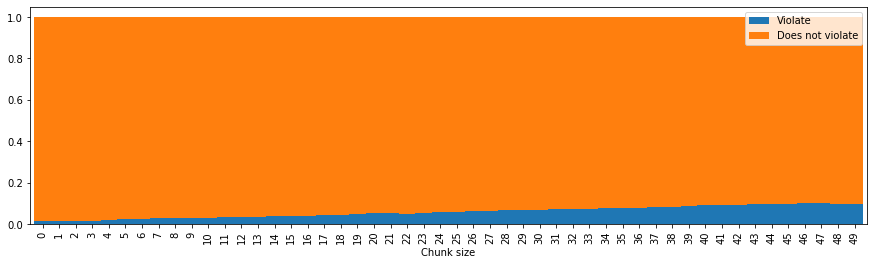

In [37]:
max_chunk_size = max(violates_partial_order['chunk_size'].max(), does_not_violate['chunk_size'].max())
plot_data = []
fig, ax = plt.subplots(1, 1, figsize=(15, 4))

for i in range(0, 50, 1):
    violate_count = int(len(violates_partial_order[violates_partial_order['chunk_size'] > i]))
    does_not_violate_count = int(len(does_not_violate[does_not_violate['chunk_size']> i]))
    total = int(violate_count) + int(does_not_violate_count)
    violate_perc = violate_count / total
    does_not_violate_perc = does_not_violate_count / total
    plot_data.append([violate_perc, does_not_violate_perc, i])

df_plot_data = pd.DataFrame(plot_data, columns=['Violate', 'Does not violate', 'chunk_size'])
ax = df_plot_data.plot.bar(stacked=True, x='chunk_size', width=1, ax=ax)
ax.set_xlabel("Chunk size")
plt.show()